In [1]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import seaborn as sns
import time

In [2]:
sc_sig = os.path.join('sp09_single_cell_res', 'sc.h5ad')
sc_adata = sc.read_h5ad(sc_sig)
sc_adata

AnnData object with n_obs × n_vars = 4250 × 189
    obs: 'Subset', 'Sample', '_indices', '_scvi_batch', '_scvi_labels'
    var: 'n_cells', 'nonz_mean'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod'
    varm: 'means_per_cluster_mu_fg', 'q05_per_cluster_mu_fg', 'q95_per_cluster_mu_fg', 'stds_per_cluster_mu_fg'

In [4]:
sc_adata.obs['Subset']

GCAGCCATCGGCCGAT-1-1         Activated NK cells
GCGGGTTAGGAGTTTA-1           Activated NK cells
GCGCGATTCTAGCACA-1           Activated NK cells
GCGCGATTCGCAAGCC-1           Activated NK cells
GCGCGATTCATATCGG-1           Activated NK cells
                                 ...           
CGCTATCTCGCGCCAA-1      TCRγδ+ effector T cells
TACACGAAGTAGGCCA-1-1    TCRγδ+ effector T cells
CCCTCCTGTCAAAGAT-1      TCRγδ+ effector T cells
CAAGGCCTCTCGCATC-1      TCRγδ+ effector T cells
CAAGGCCGTACGCTGC-1      TCRγδ+ effector T cells
Name: Subset, Length: 4250, dtype: category
Categories (17, object): ['Activated NK cells', 'CD4+ effector cells', 'Dendritic cells', 'Differenting myeloid cells', ..., 'Proliterating myeloid cells', 'T cells', 'TCRαβ+ T cells', 'TCRγδ+ effector T cells']

In [9]:
sc_adata.varm['means_per_cluster_mu_fg']

,means_per_cluster_mu_fg_Activated NK cells,means_per_cluster_mu_fg_CD4+ effector cells,means_per_cluster_mu_fg_Dendritic cells,means_per_cluster_mu_fg_Differenting myeloid cells,means_per_cluster_mu_fg_Granulocytes,means_per_cluster_mu_fg_Immature myeloid cells,means_per_cluster_mu_fg_Macrophages,means_per_cluster_mu_fg_Mature B cells,means_per_cluster_mu_fg_Monocytes,means_per_cluster_mu_fg_Myeloid cells,means_per_cluster_mu_fg_NK cells,means_per_cluster_mu_fg_Neutrophils,means_per_cluster_mu_fg_Plasmacytoid DC,means_per_cluster_mu_fg_Proliterating myeloid cells,means_per_cluster_mu_fg_T cells,means_per_cluster_mu_fg_TCRαβ+ T cells,means_per_cluster_mu_fg_TCRγδ+ effector T cells
RSRP1,0.893527,0.723933,0.591669,0.696884,0.491517,0.154075,0.550504,0.567604,0.321534,0.475143,0.677830,0.561353,0.441309,0.648080,0.709548,0.647183,0.684487
RPL14,2.472966,2.726269,2.808234,1.861539,2.556985,0.767763,2.719557,2.794850,2.151967,2.342189,2.410917,2.470851,2.514798,2.988806,2.754716,2.956865,2.818658
XIST,0.000167,0.662449,0.208999,1.001380,0.550573,0.046359,0.256156,0.267815,0.172825,0.186053,0.675519,0.065893,0.359716,0.206203,0.367421,0.437712,0.095906
PSAP,0.696860,0.544810,0.529849,2.509620,1.208651,0.600766,0.444037,0.414482,2.101746,2.575766,0.687937,0.677526,1.452993,0.337751,0.447301,0.310810,0.455750
COTL1,0.092806,0.266008,0.535265,2.006013,1.212308,1.033372,0.609195,0.727123,1.847658,2.597492,0.122064,0.236774,0.191505,0.445505,0.652708,0.741700,0.202490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD37,1.081461,1.082554,2.055844,1.210496,1.011169,0.320551,2.497486,2.447057,1.154963,1.507819,0.994408,1.026785,1.216084,1.009739,1.013529,1.101001,1.025788
TUBB1,0.010142,0.038843,0.007282,0.109830,0.256612,2.858904,0.035329,0.038567,0.093169,0.035185,0.077847,0.043658,0.051000,0.016484,0.023967,0.023864,0.023641
RPS29,3.179616,3.460989,3.761732,2.302087,3.126470,1.161422,3.740115,3.878063,2.983526,3.061929,2.988640,3.350717,3.481241,3.962111,3.735697,3.939456,3.773628
RPS3,3.126781,3.172490,3.047307,2.174094,2.953861,1.187159,3.044698,3.108440,2.610126,2.583929,2.880359,3.021203,2.951077,3.681355,3.341512,3.455579,3.408667


In [10]:
sp09_cell2loc_pred = os.path.join('sp09_single_cell_res', 'Cell2location.csv')
sp10_cell2loc_pred = os.path.join('sp10_single_cell_res', 'Cell2location.csv')
sp15_cell2loc_pred = os.path.join('sp15_single_cell_res', 'Cell2location.csv')

In [14]:
# for each row: the largest value is the predicted cell type in the column
sp09_pred_df = pd.read_csv(sp09_cell2loc_pred, index_col=0)
sp10_pred_df = pd.read_csv(sp10_cell2loc_pred, index_col=0)
sp15_pred_df = pd.read_csv(sp15_cell2loc_pred, index_col=0)

sp09_pred_df.head()

,meanscell_abundance_w_sf_Activated NK cells,meanscell_abundance_w_sf_CD4+ effector cells,meanscell_abundance_w_sf_Dendritic cells,meanscell_abundance_w_sf_Differenting myeloid cells,meanscell_abundance_w_sf_Granulocytes,meanscell_abundance_w_sf_Immature myeloid cells,meanscell_abundance_w_sf_Macrophages,meanscell_abundance_w_sf_Mature B cells,meanscell_abundance_w_sf_Monocytes,meanscell_abundance_w_sf_Myeloid cells,meanscell_abundance_w_sf_NK cells,meanscell_abundance_w_sf_Neutrophils,meanscell_abundance_w_sf_Plasmacytoid DC,meanscell_abundance_w_sf_Proliterating myeloid cells,meanscell_abundance_w_sf_T cells,meanscell_abundance_w_sf_TCRαβ+ T cells,meanscell_abundance_w_sf_TCRγδ+ effector T cells
AAACGAGACGGTTGAT-1,0.050292,0.049096,0.042285,0.036039,0.032686,0.362368,0.043402,0.038491,0.033887,0.032612,0.049988,0.043598,0.032816,0.034702,0.041300,0.036422,0.040014
AAAGGGATGTAGCAAG-1,0.061643,0.052253,0.060543,0.047153,0.052765,0.119275,0.055569,0.063974,0.057149,0.067296,0.044054,0.057139,0.050844,0.054408,0.054753,0.051981,0.049201
AAATGGTCAATGTGCC-1,0.058088,0.054052,0.056490,0.044704,0.040546,0.161506,0.052649,0.059940,0.052033,0.041721,0.058976,0.063313,0.053790,0.053260,0.054416,0.045739,0.048777
AACAACTGGTAGTTGC-1,0.032863,0.029116,0.025894,0.087854,0.046241,0.375504,0.032438,0.031747,0.062672,0.047198,0.039791,0.032063,0.029801,0.030869,0.031453,0.032549,0.031947
AACAATTACTCTACGC-1,0.068599,0.062174,0.041487,0.069862,0.063597,0.089887,0.043923,0.050588,0.046716,0.052411,0.054808,0.056135,0.048952,0.062812,0.065931,0.073124,0.048993


In [16]:
sp09_pred_df.columns = sp09_pred_df.columns.str.replace('meanscell_abundance_w_sf_', '')
sp09_pred_df.columns

Index(['Activated NK cells', 'CD4+ effector cells', 'Dendritic cells',
       'Differenting myeloid cells', 'Granulocytes', 'Immature myeloid cells',
       'Macrophages', 'Mature B cells', 'Monocytes', 'Myeloid cells',
       'NK cells', 'Neutrophils', 'Plasmacytoid DC',
       'Proliterating myeloid cells', 'T cells', 'TCRαβ+ T cells',
       'TCRγδ+ effector T cells'],
      dtype='object')

In [18]:
sp10_pred_df.columns = sp10_pred_df.columns.str.replace('meanscell_abundance_w_sf_', '')
sp10_pred_df.columns

Index(['Activated NK cells', 'CD4+ effector cells', 'Dendritic cells',
       'Differenting myeloid cells', 'Granulocytes', 'Immature myeloid cells',
       'Macrophages', 'Mature B cells', 'Monocytes', 'Myeloid cells',
       'NK cells', 'Neutrophils', 'Plasmacytoid DC',
       'Proliterating myeloid cells', 'T cells', 'TCRαβ+ T cells',
       'TCRγδ+ effector T cells'],
      dtype='object')

In [20]:
sp15_pred_df.columns = sp15_pred_df.columns.str.replace('meanscell_abundance_w_sf_', '')
sp15_pred_df.columns

Index(['Activated NK cells', 'CD4+ effector cells', 'Dendritic cells',
       'Differenting myeloid cells', 'Granulocytes', 'Immature myeloid cells',
       'Macrophages', 'Mature B cells', 'Monocytes', 'Myeloid cells',
       'NK cells', 'Neutrophils', 'Plasmacytoid DC',
       'Proliterating myeloid cells', 'T cells', 'TCRαβ+ T cells',
       'TCRγδ+ effector T cells'],
      dtype='object')

In [21]:
def get_pred_cell_type(pred_df):
    pred_cell_type = pred_df.idxmax(axis=1)
    return pred_cell_type

sp09_pred_cell_type = get_pred_cell_type(sp09_pred_df)
sp10_pred_cell_type = get_pred_cell_type(sp10_pred_df)
sp15_pred_cell_type = get_pred_cell_type(sp15_pred_df)

In [25]:
sp09_pred_cell_type.value_counts()

Immature myeloid cells         505
Proliterating myeloid cells     15
Differenting myeloid cells       6
Monocytes                        5
TCRαβ+ T cells                   4
Myeloid cells                    3
Plasmacytoid DC                  3
Dendritic cells                  1
Name: count, dtype: int64

In [26]:
sp10_pred_cell_type.value_counts()

Immature myeloid cells         655
Proliterating myeloid cells    164
Myeloid cells                  123
Differenting myeloid cells      98
Plasmacytoid DC                 59
Macrophages                     55
TCRαβ+ T cells                  41
NK cells                        36
Mature B cells                  36
T cells                         30
CD4+ effector cells             29
Activated NK cells              27
Monocytes                       23
TCRγδ+ effector T cells         18
Dendritic cells                 15
Neutrophils                     14
Granulocytes                     4
Name: count, dtype: int64

In [27]:
sp15_pred_cell_type.value_counts()

Immature myeloid cells         770
Proliterating myeloid cells     60
Myeloid cells                   34
Plasmacytoid DC                 31
Differenting myeloid cells      29
TCRαβ+ T cells                  14
Monocytes                        5
Mature B cells                   5
Activated NK cells               3
CD4+ effector cells              3
NK cells                         3
Neutrophils                      2
Dendritic cells                  1
TCRγδ+ effector T cells          1
T cells                          1
Name: count, dtype: int64

In [28]:
sp09_pred_df['pred_cell_type'] = sp09_pred_cell_type
sp10_pred_df['pred_cell_type'] = sp10_pred_cell_type
sp15_pred_df['pred_cell_type'] = sp15_pred_cell_type

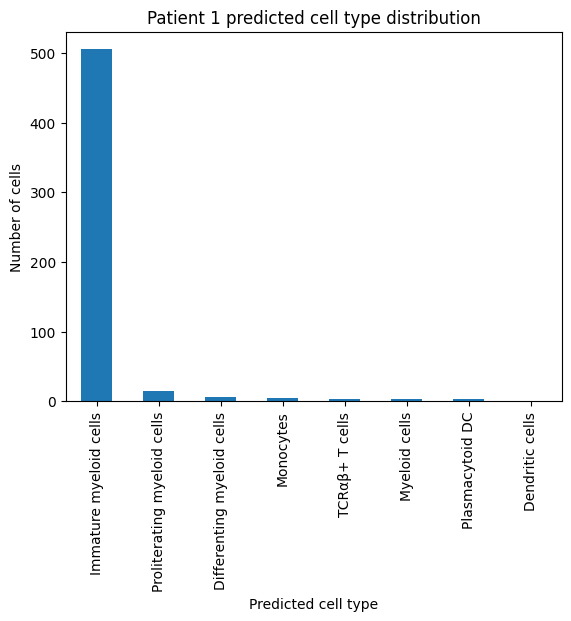

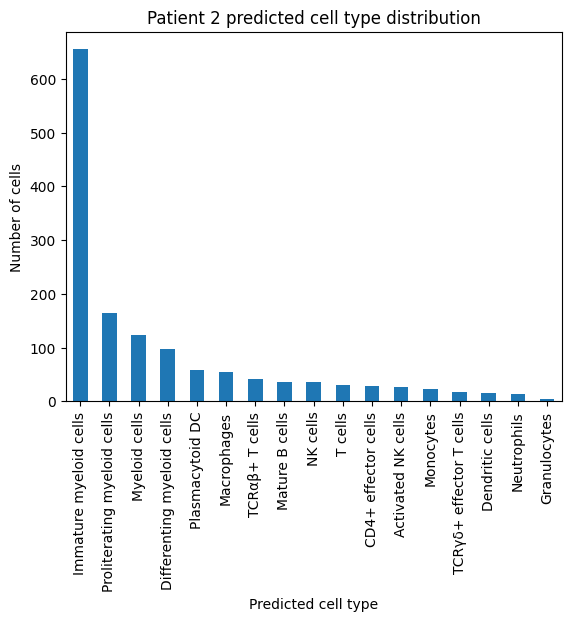

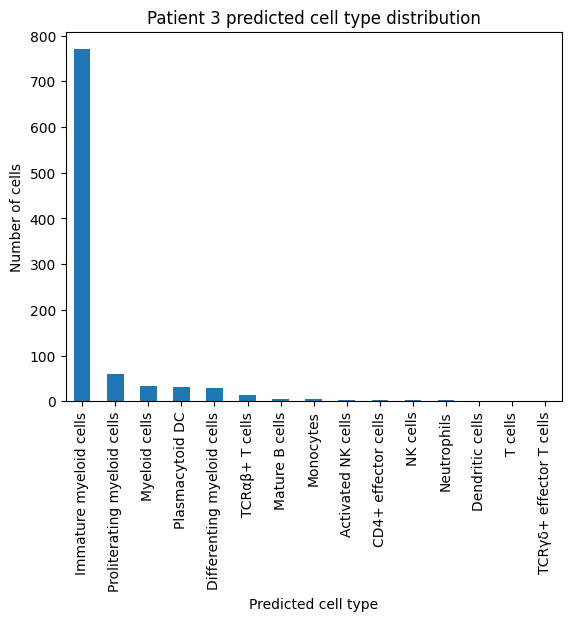

In [39]:
# plot stacked bar plot to show the cell type distribution of each sample
def plot_stacked_bar_plot(pred_df, title):
    pred_df['pred_cell_type'] = pred_df['pred_cell_type'].astype('category')
    pred_df['pred_cell_type'].value_counts().plot(kind='bar', stacked=True, title=title)
    plt.xticks(rotation=90)
    plt.xlabel('Predicted cell type')
    plt.ylabel('Number of cells')
    plt.show()

plot_stacked_bar_plot(sp09_pred_df, 'Patient 1 predicted cell type distribution')
plot_stacked_bar_plot(sp10_pred_df, 'Patient 2 predicted cell type distribution')
plot_stacked_bar_plot(sp15_pred_df, 'Patient 3 predicted cell type distribution')

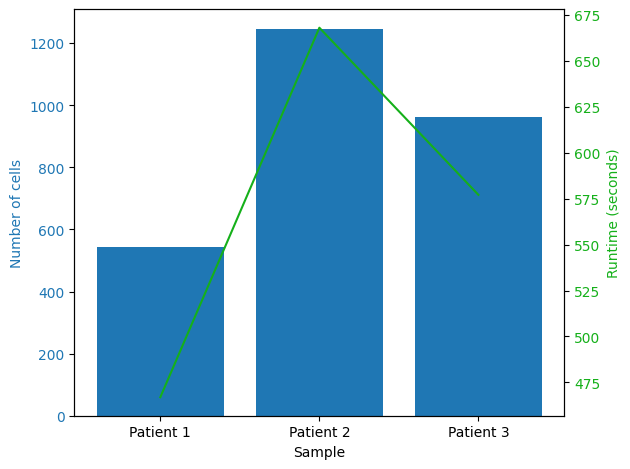

In [44]:
# sp09: 542 cells * 192 genes
# Total time comsuption: seconds
# 466.92903304100037

# sp10: 1247 cells * 192 genes
# Total time comsuption: seconds
# 668.0974028110504

# sp15: 962 cells * 192 genes
# Total time comsuption: seconds
# 577.0990748405457

# Plot the runtime of each sample and number of cells of each sample
# bar = number of cells, line = runtime

runtime_dict = {
    'Patient 1': 466.92903304100037,
    'Patient 2': 668.0974028110504,
    'Patient 3': 577.0990748405457
}

cell_num_dict = {
    'Patient 1': 542,
    'Patient 2': 1247,
    'Patient 3': 962
}

fig, ax1 = plt.subplots()

color = '#1f77b4'
ax1.set_xlabel('Sample')
ax1.set_ylabel('Number of cells', color=color)
ax1.bar(runtime_dict.keys(), cell_num_dict.values(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = '#15B01A'

ax2.set_ylabel('Runtime (seconds)', color=color)
ax2.plot(runtime_dict.keys(), runtime_dict.values(), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()